# Ingreso a Drive y GitHub

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Física\ trabajos/Delfin\ 2024

/content/drive/MyDrive/Física trabajos


In [6]:
from config import USER_EMAIL, USER_NAME, PASSWORD

PASS = PASSWORD
USUARIO = USER_NAME
EMAIL = USER_EMAIL


!git config --global user.email {EMAIL}
!git config --global user.name {USUARIO}
!git config --global user.password {PASS}

In [8]:
%cd Delfin\ 2024

/content/drive/MyDrive/Física trabajos/Delfin 2024


In [9]:
!git status

On branch master
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
  (commit or discard the untracked or modified content in submodules)
	modified:   lecturadecvsopendatacvsfiles-Jorge-1501 (modified content)

no changes added to commit (use "git add" and/or "git commit -a")


In [10]:
!git add .
!git commit -m "Prueba 2, commit desde celda"
!git push

On branch master
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
  (commit or discard the untracked or modified content in submodules)
	modified:   lecturadecvsopendatacvsfiles-Jorge-1501 (modified content)

no changes added to commit (use "git add" and/or "git commit -a")
fatal: No configured push destination.
Either specify the URL from the command-line or configure a remote repository using

    git remote add <name> <url>

and then push using the remote name

    git push <name>



___

# Tarea

<a href="https://colab.research.google.com/github/ProgramasParaFisicaDeParticulas/LecturaDeCVSOpenDataCMS/blob/main/LeyendoCSVDelOpendataDelCMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Algunos de los archivos para educación del CMS con datos abiertos están en un formato CSV. Este formato es un formato de texto sencillo en donde cada evento se guarda en columnas y cada columna correspende a una variable cinemática reconstruida con el detector. Se puede encontrar un ejemplo de esta liga
https://opendata.cern.ch/record/5208.
En partícular estos datos presentan las variables cinemáticas de dos muones producto final de la colisión protón-protón. Las variables se pueden determinar usando los cuadrimomentos de las partículas (https://es.wikipedia.org/wiki/Cuadrimomento)

## Librerías

In [3]:
#panda nos permite manipular el archivo csv https://pandas.pydata.org
import pandas as pd
#numpy nos permite hacer operaciones usando vectores https://numpy.org
import numpy as np

import matplotlib.pyplot as plt
#plotly nos permite crear graficas interactivas https://plotly.com/python/
import plotly.express as px
%matplotlib inline
print("Librerías listas, puede continuar.")

Librerías listas, puede continuar.


## Análisis

Usamos panda para leer con python el archivo CSV.

In [4]:
#usamos la liga que está directamente en la página.
particles = pd.read_csv('https://opendata.cern.ch/record/5208/files/Zmumu.csv',delimiter=',')
# usando https://opendata.cern.ch/record/5208/ obtenemos
#
particles.head()

,Run,Event,pt1,eta1,phi1,Q1,dxy1,iso1,pt2,eta2,phi2,Q2,dxy2,iso2
0,165617,74969122,54.7055,-0.4324,2.5742,1,-0.0745,0.4999,34.2464,-0.9885,-0.4987,-1,0.0712,3.4221
1,165617,75138253,24.5872,-2.0522,2.8666,-1,-0.0554,0.0000,28.5389,0.3852,-1.9912,1,0.0515,0.0000
2,165617,75887636,31.7386,-2.2595,-1.3323,-1,0.0879,0.0000,30.2344,-0.4684,1.8833,1,-0.0876,0.0000
3,165617,75779415,39.7394,-0.7123,-0.3123,1,0.0585,0.0000,48.2790,-0.1956,2.9703,-1,-0.0492,0.0000
4,165617,75098104,41.2998,-0.1571,-3.0408,1,-0.0305,1.2280,43.4508,0.5910,-0.0428,-1,0.0442,0.0000


Los nombres de las columnas se refieren a las variables que describen a llos dos muones. Corrida (Etiqueta del haz), Número de evento (colisión), Momento Transverso del primer muon, Eta del primer muón, Phi del primer muón, Carga del primer muón, distancia al vertice, lo mismo para el segundo muon y finalmente la variable de aislamiento que se relaciona con la energía de las trazas que rodean al muon.

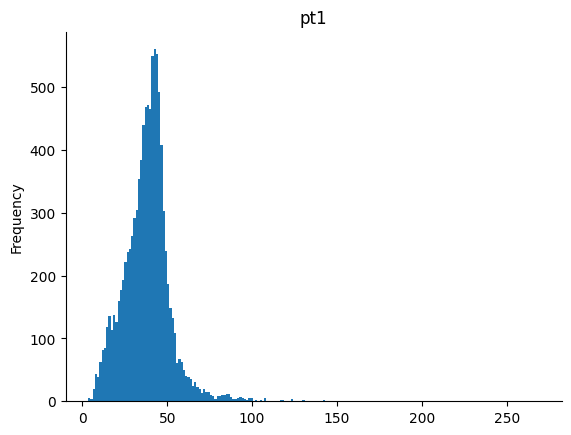

In [26]:
# @title pt1

particles['pt1'].plot(kind='hist', bins=200, title='pt1')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [61]:
fig_5=px.histogram(particles["pt1"], particles["pt1"])
fig_5.update_layout(title=r"$\text{Momento transversal 1} \ M, \ \text{%d bins}$" %1000,
                    xaxis_title=r"$GeV$",yaxis_title="Eventos")
fig_5.show()

In [23]:
print ("Descripción del momento")
particles["pt1"].describe()

Descripción del momento


count    10000.000000
mean        38.403231
std         14.427817
min          3.463700
25%         30.160275
50%         38.883850
75%         45.057750
max        269.080000
Name: pt1, dtype: float64

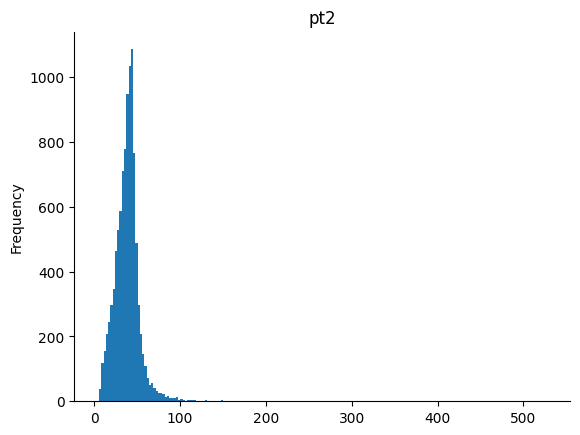

In [27]:
# @title pt2

particles['pt2'].plot(kind='hist', bins=200, title='pt2')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [5]:
fig_5=px.histogram(particles["pt2"], particles["pt2"])
fig_5.update_layout(title=r"$\text{Momento tranversal 2} \ M, \ \text{%d bins}$" %1000,
                    xaxis_title=r"$GeV$",yaxis_title="Eventos")
fig_5.show()

In [24]:
print ("Descripción del momento")
particles["pt2"].describe()

Descripción del momento


count    10000.000000
mean        38.639360
std         15.945227
min          3.266200
25%         30.033800
50%         38.932350
75%         45.194675
max        528.434000
Name: pt2, dtype: float64

### Energía total

In [ ]:
def Etotal(pt1,pt2):
  return pt1 + pt2

#Se usan los nombres de las columnas del archivo como parámetros para usar la función que calcula la masa transversa.
Energia=Etotal(particles['pt1'],particles['pt2'])

In [34]:
# Crear una nueva columna con la suma de 'A' y 'B'
particles['pt1 + pt2'] = particles['pt1'] + particles['pt2']

In [42]:
particles.head()

,Run,Event,pt1,eta1,phi1,Q1,dxy1,iso1,pt2,eta2,phi2,Q2,dxy2,iso2,pt1 + pt2
0,165617,74969122,54.7055,-0.4324,2.5742,1,-0.0745,0.4999,34.2464,-0.9885,-0.4987,-1,0.0712,3.4221,88.9519
1,165617,75138253,24.5872,-2.0522,2.8666,-1,-0.0554,0.0000,28.5389,0.3852,-1.9912,1,0.0515,0.0000,53.1261
2,165617,75887636,31.7386,-2.2595,-1.3323,-1,0.0879,0.0000,30.2344,-0.4684,1.8833,1,-0.0876,0.0000,61.9730
3,165617,75779415,39.7394,-0.7123,-0.3123,1,0.0585,0.0000,48.2790,-0.1956,2.9703,-1,-0.0492,0.0000,88.0184
4,165617,75098104,41.2998,-0.1571,-3.0408,1,-0.0305,1.2280,43.4508,0.5910,-0.0428,-1,0.0442,0.0000,84.7506


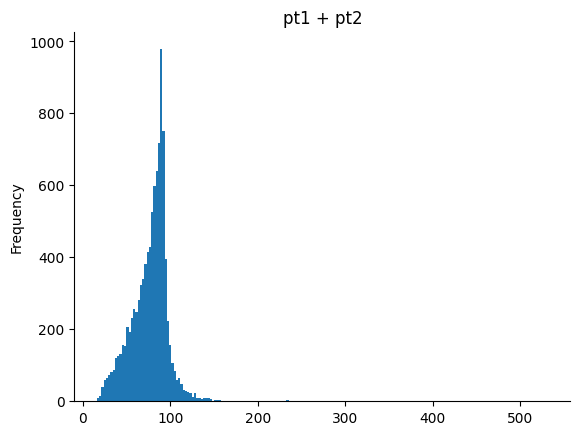

In [54]:
particles['pt1 + pt2'].plot(kind='hist', bins=200, title='pt1 + pt2')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [53]:
particles["pt1 + pt2"].describe()

count    10000.000000
mean        77.042590
std         22.188931
min         16.024900
25%         64.817450
50%         80.864300
75%         89.861625
max        531.897700
Name: pt1 + pt2, dtype: float64

In [6]:
# Crear una nueva columna con la suma de 'A' y 'B'
particles['pt1 - pt2'] = particles['pt1'] - particles['pt2']

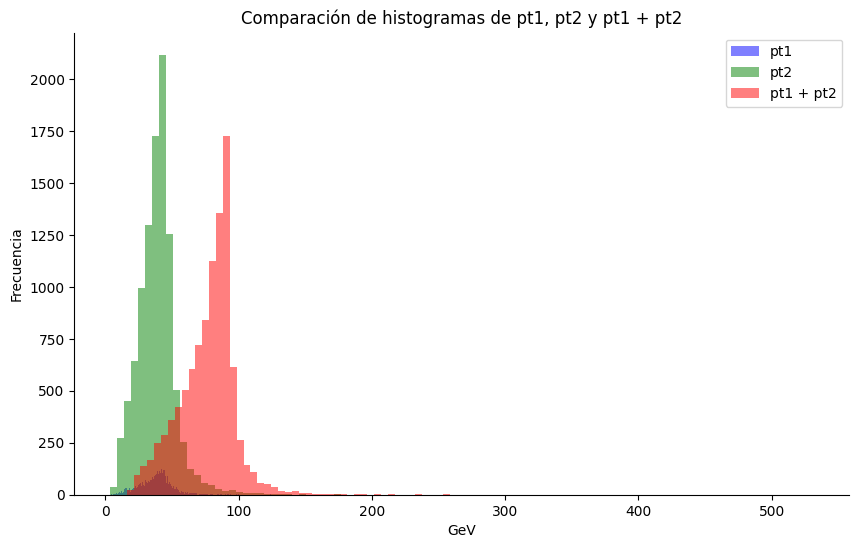

In [52]:
# Creación de una figura y ejes para los histogramas
fig, ax = plt.subplots(figsize=(10, 6))

# Gráfica los histogramas
ax.hist(particles['pt1'], bins=1000, alpha=0.5, label='pt1', color="Blue")
ax.hist(particles['pt2'], bins=100, alpha=0.5, label='pt2', color="Green")
ax.hist(particles['pt1 + pt2'], bins=100, alpha=0.5, label='pt1 + pt2', color="Red")
plt.gca().spines[['top', 'right',]].set_visible(False)

# Título y etiquetas
ax.set_title('Comparación de histogramas de pt1, pt2 y pt1 + pt2')
ax.set_xlabel('GeV')
ax.set_ylabel('Frecuencia')

ax.legend()

# Mostrar la gráfica
plt.show()

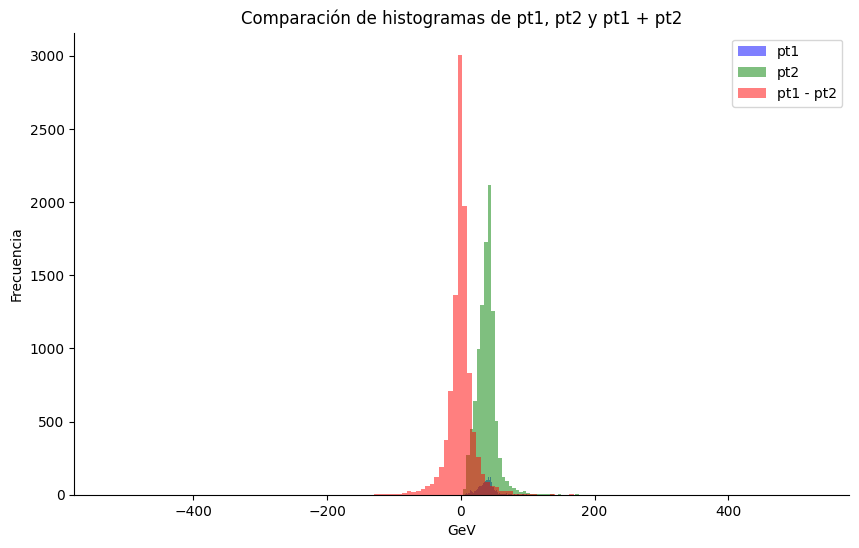

In [7]:
# Creación de una figura y ejes para los histogramas
fig, ax = plt.subplots(figsize=(10, 6))

# Gráfica los histogramas
ax.hist(particles['pt1'], bins=1000, alpha=0.5, label='pt1', color="Blue")
ax.hist(particles['pt2'], bins=100, alpha=0.5, label='pt2', color="Green")
ax.hist(particles['pt1 - pt2'], bins=100, alpha=0.5, label='pt1 - pt2', color="Red")
plt.gca().spines[['top', 'right',]].set_visible(False)

# Título y etiquetas
ax.set_title('Comparación de histogramas de pt1, pt2 y pt1 + pt2')
ax.set_xlabel('GeV')
ax.set_ylabel('Frecuencia')

ax.legend()

# Mostrar la gráfica
plt.show()

---

## Masa Invariante

In [28]:
#función para reconstruir la masa invariante de las dos partículas. Usamos la definición encontrada https://en.wikipedia.org/wiki/Invariant_mass
def mtransversa(pt1,pt2,eta1,eta2,phi1,phi2):
  return np.sqrt(2*pt1*pt2*(np.cosh(eta2-eta1)-np.cos(phi1-phi2)))

#Se usan los nombres de las columnas del archivo como parámetros para usar la función que calcula la masa transversa.
mtransv=mtransversa(particles['pt1'],particles['pt2'],particles['eta1'],particles['eta2'],particles['phi1'],particles['phi2'])

#Se crea y se grafica el histograma.
fig_5=px.histogram(mtransv,mtransv)
fig_5.update_layout(title=r"$\text{Masa invariante} \ M, \ \text{%d bins}$" %1000,
                    xaxis_title=r"$GeV$",yaxis_title="Eventos")
fig_5.show()

In [29]:
mtransv.describe()

count    10000.000000
mean        87.973980
std          8.840568
min         60.002249
25%         86.940134
50%         90.285408
75%         92.152627
max        119.952704
dtype: float64

In [8]:
particles.head()

,Run,Event,pt1,eta1,phi1,Q1,dxy1,iso1,pt2,eta2,phi2,Q2,dxy2,iso2,pt1 - pt2
0,165617,74969122,54.7055,-0.4324,2.5742,1,-0.0745,0.4999,34.2464,-0.9885,-0.4987,-1,0.0712,3.4221,20.4591
1,165617,75138253,24.5872,-2.0522,2.8666,-1,-0.0554,0.0000,28.5389,0.3852,-1.9912,1,0.0515,0.0000,-3.9517
2,165617,75887636,31.7386,-2.2595,-1.3323,-1,0.0879,0.0000,30.2344,-0.4684,1.8833,1,-0.0876,0.0000,1.5042
3,165617,75779415,39.7394,-0.7123,-0.3123,1,0.0585,0.0000,48.2790,-0.1956,2.9703,-1,-0.0492,0.0000,-8.5396
4,165617,75098104,41.2998,-0.1571,-3.0408,1,-0.0305,1.2280,43.4508,0.5910,-0.0428,-1,0.0442,0.0000,-2.1510


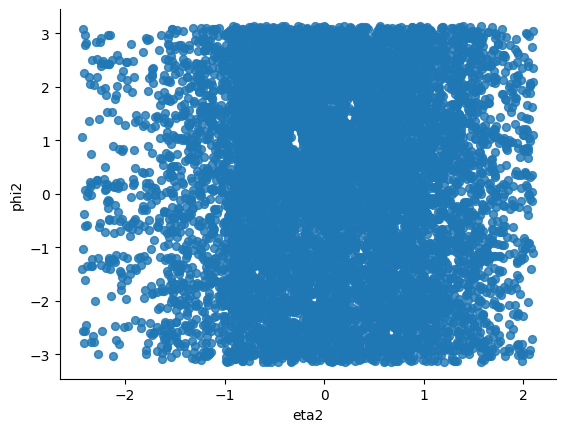

In [10]:
# @title eta1 vs phi1

particles.plot(kind='scatter', x='eta2', y='phi2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

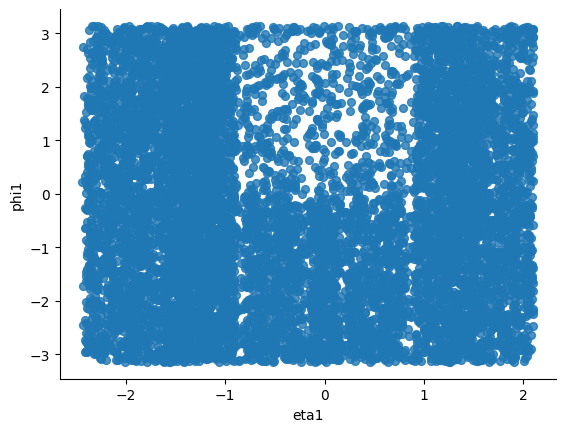

In [11]:
# @title eta1 vs phi1

particles.plot(kind='scatter', x='eta1', y='phi1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)